In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

#matplotlib graphs includes in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

#For date time conversions
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#Seaborn for beautiful graphs
import seaborn as sns
sns.set(context='paper', style='white', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)

In [3]:
#Reading excel into dataframe named df, setting index column to date, import dates in datetime format and mask no data values 
df = pd.read_csv('dateTime_kwh2001_3103.csv', index_col='date time', parse_dates=True, na_values=['0'])

# Remove missing values.
df.dropna()

# Print a concise summary of a DataFrame
df.info()

# Generate descriptive statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 592160 entries, 2020-01-20 00:00:01 to 2020-03-31 23:59:55
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   kwh     592160 non-null  float64
dtypes: float64(1)
memory usage: 9.0 MB


,kwh
count,592160.000000
mean,0.000526
std,0.000693
min,0.000100
25%,0.000200
50%,0.000400
75%,0.000600
max,0.010300


In [4]:
# Display first n values
df.head(5)

,kwh
date time,
2020-01-20 00:00:01,0.0002
2020-01-20 00:00:11,0.0002
2020-01-20 00:00:21,0.0002
2020-01-20 00:00:31,0.0002
2020-01-20 00:00:41,0.0002


In [5]:
#To get x values of specific location in database
df.loc['2020-03-25'].head(5)

,kwh
date time,
2020-03-25 00:00:02,0.0001
2020-03-25 00:00:12,0.0001
2020-03-25 00:00:22,0.0001
2020-03-25 00:00:32,0.0001
2020-03-25 00:00:42,0.0001


Text(0, 0.5, 'kWh')

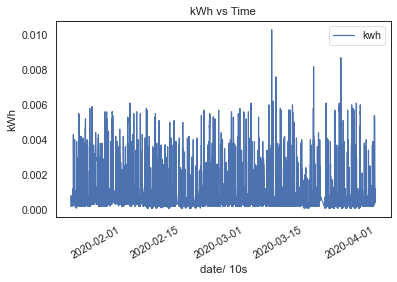

In [6]:
# General Plot of whole Data
df.plot();
plt.title('kWh vs Time')  
plt.xlabel('date/ 10s')  
plt.ylabel('kWh')  

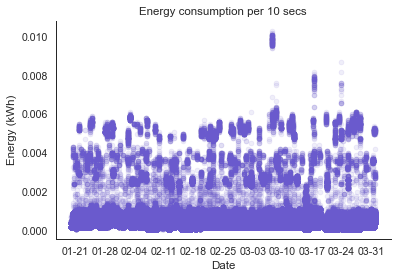

In [7]:
# Plot of data with specified details, data x-axis tick labels reformatted in desired way
fig, ax0 = plt.subplots()

# Add x-axis and y-axis
ax0.scatter(df.index.values,
       df['kwh'],
       color="Slateblue",
       alpha=0.1)

# Set title and labels for axes
ax0.set(xlabel="Date",
       ylabel="Energy (kWh)",
       title="Energy consumption per 10 secs")
       #xlim=["2020-01-20", "2020-04-01"])

# Define the date format
date_form = DateFormatter("%m-%d")
ax0.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax0.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

sns.despine()

plt.show()

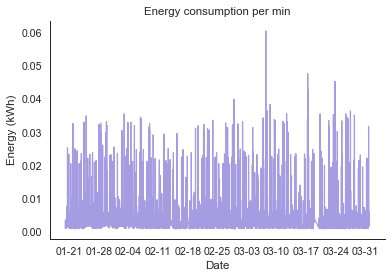

In [8]:
# Resampling data frame for per min data frequency
dfMin = df.resample('Min').sum()

# Removing data values from dataframe
dfMin.drop(dfMin[dfMin.kwh < 0.001].index, inplace=True)

# Plotting per min data 
fig, ax1 = plt.subplots()

# Add x-axis and y-axis
ax1.plot(dfMin.index.values,
       dfMin['kwh'],
       color="Slateblue",
       alpha=0.6)

# Set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="Energy (kWh)",
       title="Energy consumption per min")
       #xlim=["2020-01-20", "2020-04-01"])

# Define the date format
date_form = DateFormatter("%m-%d")
ax1.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

sns.despine()

plt.show()

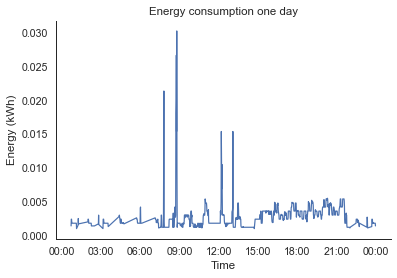

In [9]:
# General Plot of one day Data - Energy consumption per min
dfOne = dfMin.loc['2020-03-24']

# Plot of data with specified details, data x-axis tick labels reformatted in desired way
fig, ax0 = plt.subplots()

# Add x-axis and y-axis
ax0.plot(dfOne.index.values,
       dfOne['kwh'])

# Set title and labels for axes
ax0.set(xlabel="Time",
       ylabel="Energy (kWh)",
       title="Energy consumption one day")
       #xlim=["2020-01-20", "2020-04-01"])

# Define the date format
Time_form = DateFormatter("%H:%M")
ax0.xaxis.set_major_formatter(Time_form)

# Ensure a major tick for each week using (interval=1) 
#ax0.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

sns.despine()

plt.show()

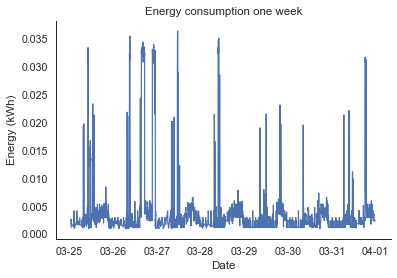

In [10]:
# General Plot of one week Data - Energy consumption per min
dfSeven = dfMin.loc['2020-03-25':'2020-03-31']

# Plot of data with specified details, data x-axis tick labels reformatted in desired way
fig, ax0 = plt.subplots()

# Add x-axis and y-axis
ax0.plot(dfSeven.index.values,
       dfSeven['kwh'])
       #color='purple')

# Set title and labels for axes
ax0.set(xlabel="Date",
       ylabel="Energy (kWh)",
       title="Energy consumption one week")
       #xlim=["2020-01-20", "2020-04-01"])

# Define the date format
Time_form = DateFormatter("%m-%d")
ax0.xaxis.set_major_formatter(Time_form)

# Ensure a major tick for each week using (interval=1) 
#ax0.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

sns.despine()

plt.show()

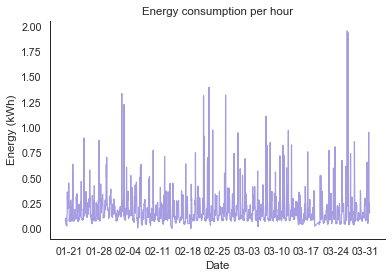

In [11]:
# Resampling data frame for per hour data frequency
dfHour = df.resample('H').sum()

# Removing data values from dataframe
dfHour.drop(dfHour[dfHour.kwh < 0.001].index, inplace=True)

# Plotting per hour data 
fig, ax2 = plt.subplots()

# Add x-axis and y-axis
ax2.plot(dfHour.index.values,
       dfHour['kwh'],
       color="Slateblue",
       alpha=0.6)

# Set title and labels for axes
ax2.set(xlabel="Date",
       ylabel="Energy (kWh)",
       title="Energy consumption per hour")
       #xlim=["2020-01-20", "2020-04-01"])

# Define the date format
date_form = DateFormatter("%m-%d")
ax2.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

sns.despine()

plt.show()

In [12]:
dfHour.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1666 entries, 2020-01-20 00:00:00 to 2020-03-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kwh     1666 non-null   float64
dtypes: float64(1)
memory usage: 26.0 KB


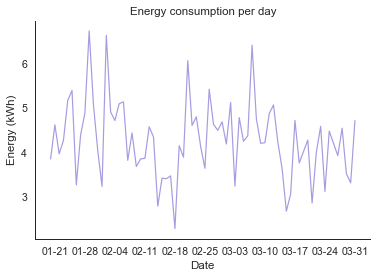

In [13]:
# Resampling data frame for per day data frequency
dfDay = df.resample('D').sum()

# Removing data values from dataframe
dfDay.drop(dfDay[dfDay.kwh < 2].index, inplace=True)
dfDay.drop(dfDay[dfDay.kwh > 7].index, inplace=True)

# Plotting per day data
fig, ax3 = plt.subplots()

# Add x-axis and y-axis
ax3.plot(dfDay.index.values,
       dfDay['kwh'],
       color="Slateblue",
       alpha=0.6)

# Set title and labels for axes
ax3.set(xlabel="Date",
       ylabel="Energy (kWh)",
       title="Energy consumption per day")

# Define the date format
date_form = DateFormatter("%m-%d")
ax3.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax3.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

sns.despine()

plt.show()

In [14]:
dfDay.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 2020-01-20 to 2020-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kwh     70 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


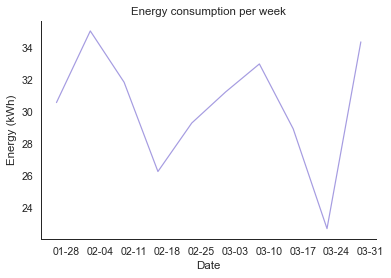

In [15]:
# Resampling data frame for per week data frequency
dfWeek = df.resample('W').sum()

dfWeek = dfWeek.truncate(before='2020-01-20', after='2020-03-31')

# Plotting per day data
fig, ax3 = plt.subplots()

# Add x-axis and y-axis
ax3.plot(dfWeek.index.values,
       dfWeek['kwh'],
       color="Slateblue",
       alpha=0.6)

# Set title and labels for axes
ax3.set(xlabel="Date",
       ylabel="Energy (kWh)",
       title="Energy consumption per week")

# Define the date format
date_form = DateFormatter("%m-%d")
ax3.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax3.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

sns.despine()

plt.show()

In [16]:
dfWeek.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2020-01-26 to 2020-03-29
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kwh     10 non-null     float64
dtypes: float64(1)
memory usage: 160.0 bytes


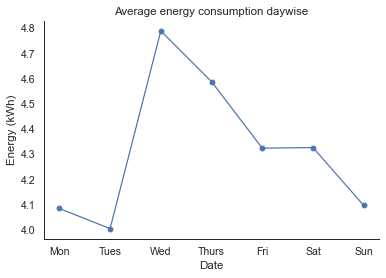

In [17]:
# Grouping whole data by days of week
weekdays = dfDay.groupby(dfDay.index.dayofweek).mean()
weekdays.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

# Plotting data by the dayes of week
fig, ax4 = plt.subplots()

# Add x-axis and y-axis
ax4.plot(weekdays.index.values,
        weekdays['kwh'],
        marker='o')
        #color='purple')

# Set title and labels for axes
ax4.set(xlabel="Date",
       ylabel="Energy (kWh)",
       title="Average energy consumption daywise")

sns.despine()

plt.show()

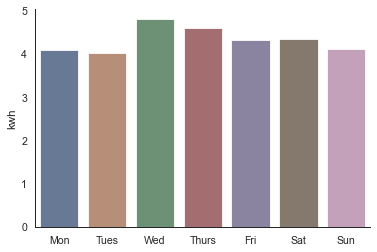

In [18]:
# Plotting bar plots
sns.barplot(data=weekdays, x = weekdays.index.values, y = weekdays['kwh'], saturation=.45)

sns.despine()

plt.show()

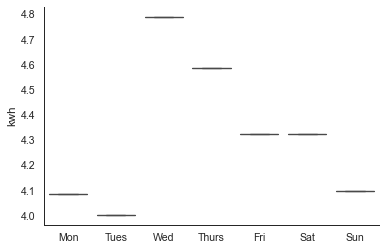

In [24]:
# Plotting a boxplot
sns.boxplot(data=weekdays, x = weekdays.index.values, y = weekdays['kwh']);
sns.despine()

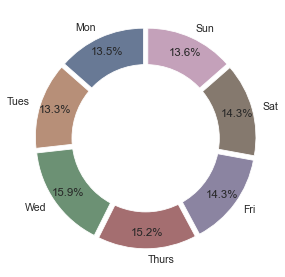

In [19]:
#Plot donught pie chart
labels = weekdays.index
sizes = weekdays['kwh']

#colors
#colors = ['#c88691','#ad85ba','#95a1c3', '#74a18e','#b2c891','#949494','#d6d6d6']
colors = ['#687995','#b78f78','#6c9174','#a46e70','#8b84a1','#85796e','#c4a1ba']

#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

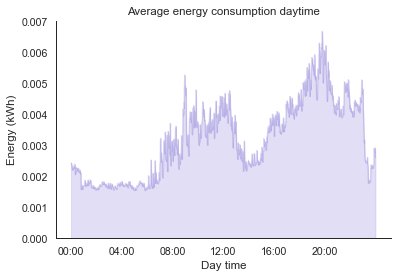

In [21]:
# Grouping whole data on hourly basis 
hourly = dfMin.groupby(dfMin.index.time).mean()

# Creating x ticks
hourly_x_ticks = 4 * 60 * 60 * np.arange(6)

# Plotting data by the hours 
hourly.plot(kind='area', xticks=hourly_x_ticks, color="Slateblue", alpha=0.2, legend=False)
plt.xlabel('Day time')  
plt.ylabel('Energy (kWh)')
plt.title('Average energy consumption daytime')

sns.despine()

plt.show()

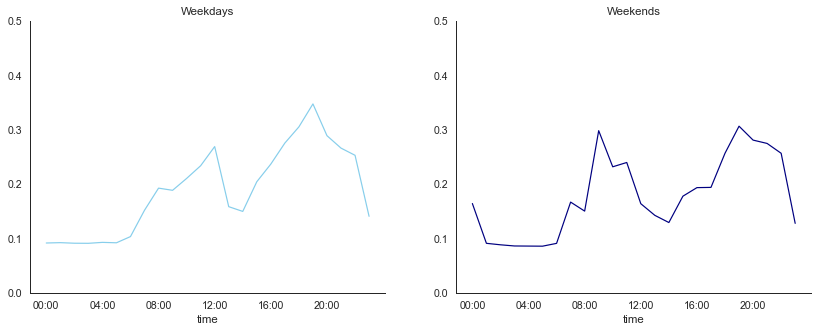

In [22]:
# Grouping whole data on weekday and weekend basis 
weekend = np.where(dfHour.index.weekday < 5, 'Weekday', 'Weekend')
days_hour = dfHour.groupby([weekend, dfHour.index.time]).mean()

# Plotting data by the hours for weekdays and weekends (SIDE by SIDE)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
days_hour.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_x_ticks, ylim=(0, 0.5), legend=False, color="skyblue")
days_hour.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_x_ticks, ylim=(0, 0.5), legend=False, color="navy")

#plt.savefig('perWeekdaysWeekends.png', dpi=300, bbox_inches='tight')

sns.despine()

plt.show()

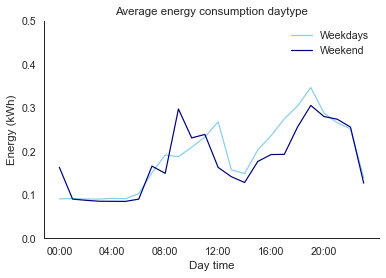

In [23]:
# Grouping whole data on weekday and weekend basis, plotting in same graph 
weekend = np.where(dfHour.index.weekday < 5, 'Weekday', 'Weekend')
days_hour = dfHour.groupby([weekend, dfHour.index.time]).mean()

# Plotting data by the hours for weekdays and weekends in same graph
# gca stands for 'get current axis'
ax = plt.gca()

days_hour.loc['Weekday'].plot(ax=ax, xticks=hourly_x_ticks, ylim=(0, 0.5), color="skyblue")
days_hour.loc['Weekend'].plot(ax=ax, xticks=hourly_x_ticks, ylim=(0, 0.5), color="navy")

#Modify legend
ax.legend(["Weekdays", "Weekend"], frameon=False);

plt.xlabel('Day time')  
plt.ylabel('Energy (kWh)')
plt.title('Average energy consumption daytype')

sns.despine()

plt.show()